In [1]:
# visualisation
import matplotlib.pyplot as plt

# data analysis
import numpy as np
import pandas as pd
import mglearn
from sklearn.datasets import load_iris

The following line loads the Iris dataset from the scikit-learn library. Once loaded, it is now possible to explore the dataset to better understand how to visualize it.

In [2]:
iris_dataset = load_iris()

## Data Exploration

In [3]:
#export
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:490] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
       
...


In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


What is so far understood from the dataset:
* 3 targets exist, 'setosa' 'versicolor' and 'virginica'
* 4 features exist, all expressed in the same unit (cm)


In [7]:
print("Data type: {}".format(type(iris_dataset['data'])))

Data type: <class 'numpy.ndarray'>


In [8]:
print("Data shape: {}".format(iris_dataset['data'].shape))

Data shape: (150, 4)


The array contains measurements for 150 different flowers. In machine learning, individual items are called samples, and their properties are called features. The shape of the data array is the number of samples multiplied by the number of features. This is a convention in scikit-learn, and the data will always be assumed to be in this shape. Here are the feature values for the first five
samples:

In [9]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The first five flowers have a petal width of 0.2 cm and the first flower has the longest sepal, at 5.1 cm.
The target array contains the species of each of the flowers that were measured, also as a NumPy array:

In [10]:
print("Data type: {}".format(type(iris_dataset['target'])))

Data type: <class 'numpy.ndarray'>


In [11]:
print("Data shape: {}".format(iris_dataset['target'].shape))

Data shape: (150,)


The target is a one-dimensional array, with one entry per flower.

In [12]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


To understand this output, refer back to the iris['target_names'] array:
0 means setosa, 1 means versicolor, and 2 means virginica

### Training and Testing Data

From the data explored in the previous section, now it is possible to build a machine learning model from this dataset. This model can then be used to predict the species of iris when presented with a new set of measurements. 
It is necessary to test the model before it is used. A satisfactory test would give a quantifiable number on how accurate the model is.

It is not a good idea to evaluate the model with the same data used to build the model. In order to see if the model will generalize well (perform well on new data) it will be stronger to use a different dataset.

This can be achieved by splitting the dataset. This can be split into two parts:

* training data
* test data

Within the scikit-learn library there exists a function that can split datasets. This function is called train_test_split. This function extracts 75% of the initial dataset, including the corresponding labels of this portion of the data. Whats remains is 25% of the original dataset, together with the corresponding labels for this data. This is declared as the test set.

Inspired by the standard formulation $f(x)=y$, scikit-learn denotes data with a capital X and labels by a lowercase y. So x is the input and y is the output. The capital X is used because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).

Calling the train_test_split on the initial dataset and assigning the outputs using this nomenclature:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

The above function shuffles the dataset before splitting it. This is important to improve how the model will generalize when it is eventualy used. Shuffling the data makes sure that the test data contains data from all classes.

To ensure that the output of this function is the same every time it is run, the random_state parameter is used with a fixed seed. This is a pseudorandom number generator.

The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [15]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## Data Visualization


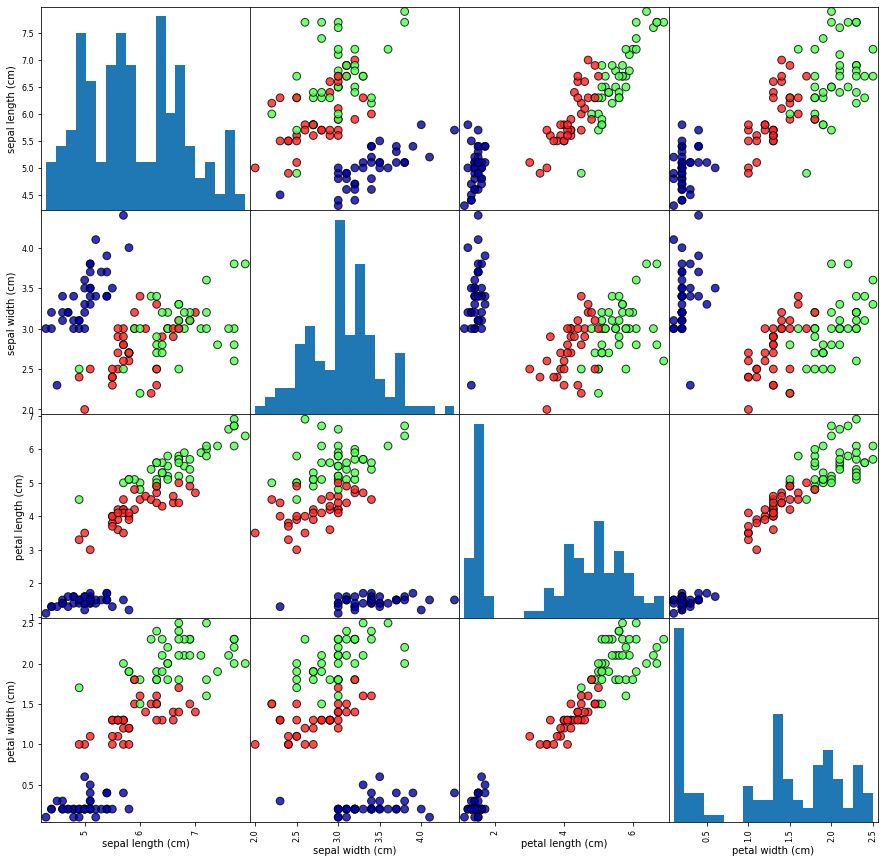

In [16]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', edgecolors="black",
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

hist_kwds is used for Keyword arguments to be passed to the hist function.
The parameter "bin" refers to the range of values, meaning that the entire range of values is divided into a series of intervals (in this case 20) which are then used to count how many values fall into each interval.

### k-Nearest Neighbors

Using the k-Nearest Neighbors classification algorithm in scikit-learn, the training set can be stored. To predict a new data point, the algorithm locates the point that is closest in value within the training set to the new point. Then it assigns the label of this training point to the new data point.

k allows the consideration of any fixed number of neighbor points when training. For example 5 or 10 of the nearest neighbors. In this example n_neighbors = 1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Prediction

Using this KNN model it is now possible to make predictions on what species new data may belong to. Lets say an iris was found in the wild with a sepal length of 5.3 cm, a sepal width of 8.2 cm, a petal length of 3.5 cm, and a petal width of 4.6 cm.

To predict what species of iris would this be this data can be put into a NumPy array. Once in the array the shape can be calculated, meaning the number of samples (1) multiplied by the number of features (4):

In [19]:
X_new = np.array([[5.3, 8.2, 3.5, 4.6]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


The measurements for this single flower are in a row in a two-dimensional NumPy array, this is important as the scikit-learn library always expects a two-dimensional array for data input.
To now make a prediction on what the newly collected flower species might be, the predict method of the knn object must be called:

In [20]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


The model predicts that this new iris belongs to the class 2, meaning its species is
virginica. 
Now it is important to test to what degree this model can be trusted.

## Evaluation

The test set that was created previously (train_test_split) can now be used to evaluate the model. This data was not used to build the model. What is important about the test set is that the correct species for each iris in the test set is known. Therefore, a prediction can be made for each iris in the test data and then compared against its label (the known species).
The accuracy of the model can then be computed, which is the fraction of flowers for which the right species was predicted:

In [21]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


The test set accuracy is about 0.97 for this model. Meaning, a correct prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that the model is expected to be correct 97% of the time for new irises. 
This high level of accuracy means that the model may be trustworthy enough to use.